In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [3]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
X=pd.concat([X,geography,gender],axis=1)

In [5]:
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ANN

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
# Initialising the ANN
classifier = Sequential()

In [10]:

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

C:\Users\user\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
  


In [11]:
# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))

C:\Users\user\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
  


In [12]:
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

C:\Users\user\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
  


In [13]:

classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [14]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

C:\Users\user\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 267us/step - loss: 0.5690 - accuracy: 0.7626 - val_loss: 0.4915 - val_accuracy: 0.7955
Epoch 2/100
5359/5359 [==============================] - 1s 250us/step - loss: 0.4684 - accuracy: 0.7992 - val_loss: 0.4557 - val_accuracy: 0.8054
Epoch 3/100
5359/5359 [==============================] - 1s 221us/step - loss: 0.4446 - accuracy: 0.8061 - val_loss: 0.4403 - val_accuracy: 0.8069
Epoch 4/100
5359/5359 [==============================] - 1s 216us/step - loss: 0.4324 - accuracy: 0.8102 - val_loss: 0.4310 - val_accuracy: 0.8080
Epoch 5/100
5359/5359 [==============================] - 1s 240us/step - loss: 0.4247 - accuracy: 0.8130 - val_loss: 0.4255 - val_accuracy: 0.8099
Epoch 6/100
5359/5359 [==============================] - 1s 213us/step - loss: 0.4196 - accuracy: 0.8164 - val_loss: 0.4217 - val_accuracy: 0.8114
Epoch 7/100
5359/5359 [==============================] - 1s 234us/step

5359/5359 [==============================] - 1s 253us/step - loss: 0.3387 - accuracy: 0.8587 - val_loss: 0.3675 - val_accuracy: 0.8516
Epoch 57/100
5359/5359 [==============================] - 1s 217us/step - loss: 0.3388 - accuracy: 0.8627 - val_loss: 0.3670 - val_accuracy: 0.8527
Epoch 58/100
5359/5359 [==============================] - 1s 207us/step - loss: 0.3383 - accuracy: 0.8628 - val_loss: 0.3679 - val_accuracy: 0.8535
Epoch 59/100
5359/5359 [==============================] - 1s 211us/step - loss: 0.3383 - accuracy: 0.8595 - val_loss: 0.3679 - val_accuracy: 0.8508
Epoch 60/100
5359/5359 [==============================] - 1s 253us/step - loss: 0.3381 - accuracy: 0.8602 - val_loss: 0.3673 - val_accuracy: 0.8527
Epoch 61/100
5359/5359 [==============================] - 1s 232us/step - loss: 0.3379 - accuracy: 0.8614 - val_loss: 0.3668 - val_accuracy: 0.8519
Epoch 62/100
5359/5359 [==============================] - 1s 237us/step - loss: 0.3378 - accuracy: 0.8610 - val_loss: 0.3675 

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


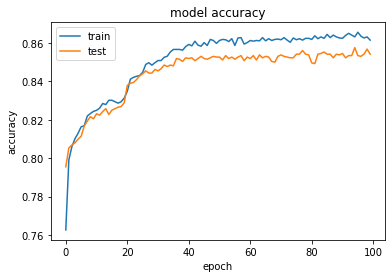

In [16]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

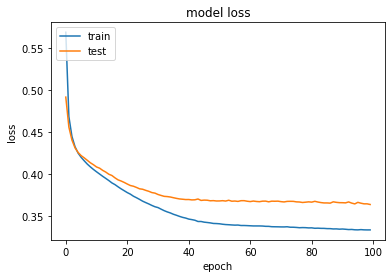

In [17]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Making the predictions and evaluating the model

In [18]:

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [19]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)


In [21]:
score

0.8595

In [23]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [30]:
li=[619,42,2,0.00,1,1,1,101348.88,0,0,0]
li=np.array(li)
lir=li.reshape(1,-1)
#lix=sc.transform(li)

In [31]:
lir

array([[6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00]])

In [32]:
lix=sc.transform(lir)

In [33]:
y_predict = classifier.predict(lix)

In [39]:
y_predict=y_predict>0.5
type(y_predict)

numpy.ndarray

In [40]:
type(y_pred)

numpy.ndarray

In [41]:
import joblib

In [42]:
joblib.dump(classifier,"model.pkl")

['model.pkl']

In [43]:
m=joblib.load("model.pkl")

In [44]:
var1=0
var2=0
var3=0
var4=0
var5=0
var6=0
var7=0
var8=0
var9=0
var10=0
var11=0

In [64]:
liz=[619,42,2,0.00,1,1,1,101.88,0,0,0]
liz=np.array(liz)
lizr=liz.reshape(1,-1)

In [57]:
x=m.predict([lir])
y=m.predict([lizr])

In [65]:
lizr=sc.fit_transform(lizr)
y=m.predict([lizr])
y

array([[0.10559713]], dtype=float32)

In [50]:
x

array([[7.826896e-33]], dtype=float32)

In [51]:
print(x)

[[7.826896e-33]]


In [54]:
y=classifier.predict(lix)

In [55]:
y

array([[0.39756975]], dtype=float32)

In [68]:
y_train

7389    0
9275    0
2995    0
5316    0
356     0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 8000, dtype: int64